#Sesión 11 - Diplomado Data Science Duoc UC

# Módulo: Machine Learning

A continuación, aprenderás como son los sistemas de reconocimiento de imágenes con el uso de redes neuronales.

**Recuerda almacenar una copia de este Jupyter Notebook con todos los recursos adicionales en tu Google Drive para poder ejecutar los bloques de código.**


---

# Descripción o Motivación
La actividad que se realizará a continuación, está basada en el reconocimiento de figuras geométricas (clasificación) a través del uso de Redes Neuronales de tipo Convolucionales.

Las figuras que utilizaremos son Círculos, Cuadrados, Estrellas y Triángulos.


# Importar Librerías

In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

# Cargar set de Imágenes

In [ ]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/Diplomado DS Duoc/Sesión 11 - Redes Neuronales y Reconocimiento de Imágenes/"#Esta es la ruta
!ls /content/drive/My\ Drive/Diplomado\ DS\ Duoc/Sesión\ 11\ -\ Redes\ Neuronales\ y\ Reconocimiento\ de\ Imágenes/


Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive
 Ejercicio_CNN.ipynb  'Figuras Geométricas'   test


In [ ]:
dirname = os.path.join(path, 'Figuras Geométricas')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            print(filename,' ',image.shape) #Imprimimos para identificar las imágenes erróneas en shape
            images.append(image)
            #print(images[cant-1])
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))


leyendo imagenes de  /content/drive/My Drive/Diplomado DS Duoc/Sesión 11 - Redes Neuronales y Reconocimiento de Imágenes/Figuras Geométricas/
estrella1(1).jpg   (34, 50, 3)
/content/drive/My Drive/Diplomado DS Duoc/Sesión 11 - Redes Neuronales y Reconocimiento de Imágenes/Figuras Geométricas/Estrellas 1
estrella2(1).jpg   (34, 50, 3)
estrella4(1).jpg   (34, 50, 3)
estrella6(1).jpg   (34, 50, 3)
estrella7(1).jpg   (34, 50, 3)
estrella8(1).jpg   (34, 50, 3)
estrella9(1).jpg   (34, 50, 3)
estrella10(1).jpg   (34, 50, 3)
estrella5(1).jpg   (34, 50, 3)
estrella3(1).jpg   (34, 50, 3)
Estrella.jpg   (34, 50, 3)
Estrella1.jpg   (34, 50, 3)
Estrella2.jpg   (34, 50, 3)
Estrella3.jpg   (34, 50, 3)
Estrella4.jpg   (34, 50, 3)
Estrella5.jpg   (34, 50, 3)
Estrella6.jpg   (34, 50, 3)
Estrella7.jpg   (34, 50, 3)
Estrella8.jpg   (34, 50, 3)
Estrella9.jpg   (34, 50, 3)
Estrella10.jpg   (34, 50, 3)
Estrella11.jpg   (34, 50, 3)
images (1).jpg   (34, 50, 3)
image8s.jpg   (34, 50, 3)
images444.jpg   (34, 50

Las imágenes en png con transparencia contienen un 4to canal de color que no era reconocida por la lectura de imágenes. Una imagen sin transparencia tiene 3 (RGB)


Imagen normal shape(34,50,3)
Imagen png con transparencia shape(34,50,4)

# Creamos las etiquetas

In [ ]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  121


In [ ]:
figuras=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    figuras.append(name[len(name)-1])
    indice=indice+1

0 Estrellas
1 Cuadrados
2 Circulos
3 Triangulos


In [ ]:
y = np.array(labels)

X = np.array(images, dtype=np.uint8)
print(X.dtype)
#Cuando la imágen tiene 4 canales de color, llega como tipo dato list y no array como debía ser

classes = np.unique(y) #identificación de las clases para el modelo supervizado.
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

uint8
Total number of outputs :  4
Output classes :  [0 1 2 3]


# Creamos Sets de Entrenamiento y Test

In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (96, 34, 50, 3) (96,)
Testing data shape :  (25, 34, 50, 3) (25,)


Text(0.5, 1.0, 'Ground Truth : 3')

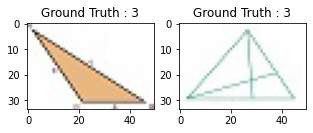

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [ ]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=5)
#El random_state fue uno de los parámetros que se modificaron para alcanzar un accuracy más alto, se probó con 13, con 20, con 30 y con 5

In [ ]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(76, 34, 50, 3) (20, 34, 50, 3) (76, 4) (20, 4)


# Creamos el modelo de CNN
Usaremos un modelo SECUENCIAL con diferentes capas.

1. Crearemos una primer capa de neuronas  “Convolucional de 2 Dimensiones” Conv2D() , donde entrarán las imágenes
2.   Se aplican 32 filtros (kernel) de tamaño 3×3.
3.   Se utiliza La función LeakyReLU como activación de las neuronas.
4.   Se hace un MaxPooling (de 2×2) que reduce la imagen que entra.
5.   Para evitar el overfitting, añadimos la técnica  Dropout
6.   “Aplanamos” Flatten()  los 32 filtros y creamos una capa de 32 neuronas “tradicionales” Dense().
7.   Y se finaliza la capa de salida con 10 neuronas con activación Softmax, para que se corresponda con el “hot encoding”.


In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-2 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 35 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 3 # cantidad de imágenes que se toman a la vez en memoria

#Experimentos
En estos parámetros de configuración realizamos muchas combinaciones posibles. Al principio tenpiamos un set de 25 imágenes y probábamos modificndo el init_lr subiendolo a 1e-1 y bajándolo hasta 1e-5 ya que es la tasa con la que aprenderá la red. Finalmente nos quedamos con el valor 1e-2.
Las epoch las variamos entre 3 hasta 60 en diferentes combinaciones con el tamaño del batch y con la configuración de filtros Conv2D.
El tamaño del batch también varió, pero nos quedamos con un número bajo pensando en el tamaño total de la muestra de imágenes.

Con respecto al bloque que viene a continuación, durante los experimentos que hicimos fueron modificando el valor de la cantidad de filtros de la primera capa entre 32, 64 y 128.
 

In [ ]:
figure_model = Sequential()
figure_model.add(Conv2D(64, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(34,50,3)))
figure_model.add(LeakyReLU(alpha=0.1))
figure_model.add(MaxPooling2D((2, 2),padding='same'))
figure_model.add(Dropout(0.5))

figure_model.add(Flatten())
figure_model.add(Dense(64, activation='linear'))
figure_model.add(LeakyReLU(alpha=0.1))
figure_model.add(Dropout(0.5))
figure_model.add(Dense(nClasses, activation='softmax'))

In [ ]:
figure_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 34, 50, 64)        1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 34, 50, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 27200)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1740864   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0

In [ ]:
figure_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [ ]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre

figure_train = figure_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/35
26/26 [==============================] - 8s 25ms/step - loss: 2.4332 - accuracy: 0.2684 - val_loss: 1.3469 - val_accuracy: 0.4000
Epoch 2/35
26/26 [==============================] - 0s 4ms/step - loss: 1.3364 - accuracy: 0.3886 - val_loss: 1.3392 - val_accuracy: 0.2500
Epoch 3/35
26/26 [==============================] - 0s 4ms/step - loss: 1.3223 - accuracy: 0.4018 - val_loss: 1.3413 - val_accuracy: 0.2500
Epoch 4/35
26/26 [==============================] - 0s 4ms/step - loss: 1.2608 - accuracy: 0.4475 - val_loss: 1.2334 - val_accuracy: 0.5500
Epoch 5/35
26/26 [==============================] - 0s 4ms/step - loss: 1.2319 - accuracy: 0.4590 - val_loss: 1.1458 - val_accuracy: 0.5000
Epoch 6/35
26/26 [==============================] - 0s 4ms/step - loss: 1.0687 - accuracy: 0.6456 - val_loss: 1.1201 - val_accuracy: 0.4500
Epoch 7/35
26/26 [==============================] - 0s 4ms/step - loss: 1.0523 - accuracy: 0.5421 - val_loss: 1.0683 - val_accuracy: 0.6000
Epoch 8/35
26/26 [=

In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
figure_model.save("figure_mnist.h5py")

INFO:tensorflow:Assets written to: figure_mnist.h5py/assets


# Evaluamos la red

In [ ]:
test_eval = figure_model.evaluate(test_X, test_Y_one_hot, verbose=1)

1/1 [==============================] - 0s 28ms/step - loss: 0.4070 - accuracy: 0.8000


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4070374369621277
Test accuracy: 0.800000011920929


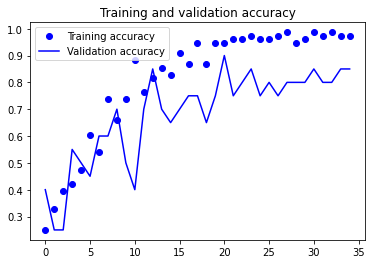

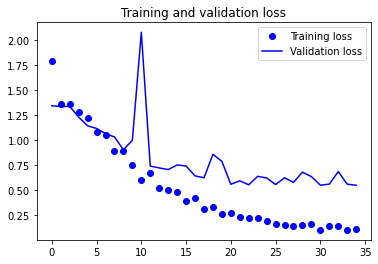

In [ ]:
accuracy = figure_train.history['accuracy']
val_accuracy = figure_train.history['val_accuracy']
loss = figure_train.history['loss']
val_loss = figure_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes2 = figure_model.predict(test_X)

In [ ]:
predicted_classes=[]
for predicted_figure in predicted_classes2:
    predicted_classes.append(predicted_figure.tolist().index(max(predicted_figure)))
predicted_classes=np.array(predicted_classes)

In [ ]:
predicted_classes.shape, test_Y.shape

((25,), (25,))

# Aprendamos de los errores: Qué mejorar

Found 20 correct labels


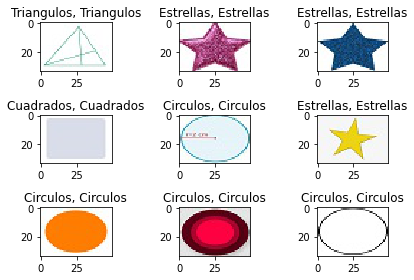

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(34,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(figuras[predicted_classes[correct]],
                                                    figuras[test_Y[correct]]))

    plt.tight_layout()

Found 5 incorrect labels


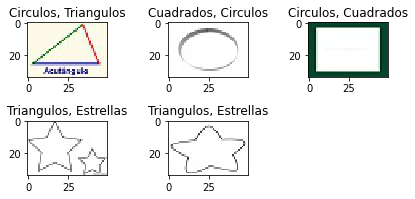

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(34,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(figuras[predicted_classes[incorrect]],
                                                    figuras[test_Y[incorrect]]))
    plt.tight_layout()

In [ ]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.78      0.88         9
     Class 1       0.80      0.80      0.80         5
     Class 2       0.75      0.86      0.80         7
     Class 3       0.60      0.75      0.67         4

    accuracy                           0.80        25
   macro avg       0.79      0.80      0.79        25
weighted avg       0.83      0.80      0.81        25



# Predicción de una nueva imagen

Acá le pasamos una imagen que no existe dentro de la muestra y también una imagen que si existe dentro de las imágenes de entrenamiento. 
Las imágenes de entrenamiento las asertó correctamente como se muestra a cointinuación en los siguientes bloques:

In [ ]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [path+'test/c60.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (34, 50),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = figure_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], figuras[img_tagged.tolist().index(max(img_tagged))])

/content/drive/My Drive/Diplomado DS Duoc/Sesión 11 - Redes Neuronales y Reconocimiento de Imágenes/test/c60.jpg Cuadrados


In [ ]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [path+'test/Cubo.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (34, 50),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = figure_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], figuras[img_tagged.tolist().index(max(img_tagged))])

/content/drive/My Drive/Diplomado DS Duoc/Sesión 11 - Redes Neuronales y Reconocimiento de Imágenes/test/Cubo.jpg Cuadrados


In [ ]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [path+'test/Estrellita.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (34, 50),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = figure_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], figuras[img_tagged.tolist().index(max(img_tagged))])

/content/drive/My Drive/Diplomado DS Duoc/Sesión 11 - Redes Neuronales y Reconocimiento de Imágenes/test/Estrellita.jpg Estrellas


In [ ]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [path+'test/cono.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (34, 50),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = figure_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print('El archivo:'+filenames[i]+' corresponde a una figura de tipo: ', figuras[img_tagged.tolist().index(max(img_tagged))])

El archivo:/content/drive/My Drive/Diplomado DS Duoc/Sesión 11 - Redes Neuronales y Reconocimiento de Imágenes/test/cono.jpg corresponde a una figura de tipo:  Triangulos


#Conclusiones?


